**Instalar Librerias**

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import tensorflow as tf
from sklearn.preprocessing import StandardScaler
from sklearn import linear_model
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
import joblib

**Generar Dataset**

In [ ]:
df=pd.read_csv('dataset.csv', sep=',')
df.columns =['id', 'competition-date', 'competition-city', 'competition-name', 'event-category', 'event-style', 'event-distance', 'event-distance-measure', 'event-name', 'event-date', 'atlete-position', 'atlete-name', 'atlete-yob', 'atlete-age', 'atlete-country', 'atlete-time', 'atlete-fina21-points', 'atlete-power-points']
df.dtypes

id                         int64
competition-date          object
competition-city          object
competition-name          object
event-category            object
event-style               object
event-distance             int64
event-distance-measure    object
event-name                object
event-date                object
atlete-position           object
atlete-name               object
atlete-yob                 int64
atlete-age                 int64
atlete-country            object
atlete-time               object
atlete-fina21-points       int64
atlete-power-points        int64
dtype: object

**Eliminamos, columnas que no se van a usar**

In [ ]:
df=df.drop(['id', 'competition-date', 'competition-city', 'competition-name','event-style', 'event-distance-measure', 'event-name', 'event-date', 'atlete-position', 'atlete-name', 'atlete-yob','atlete-country', 'atlete-fina21-points'], axis=1)
df.dtypes

event-category         object
event-distance          int64
atlete-age              int64
atlete-time            object
atlete-power-points     int64
dtype: object

**Cambiamos variable atlete-time, normalizandola a segundos**

In [ ]:
aux=df['atlete-time'].str.split(':', expand=True)
aux[0]=pd.to_numeric(aux[0])
aux[1]=pd.to_numeric(aux[1])
df['atlete-time']= np.where(aux.isna().any(axis=1), aux[0], round(((aux[0]*60)+aux[1]),2))
df.dtypes

event-category          object
event-distance           int64
atlete-age               int64
atlete-time            float64
atlete-power-points      int64
dtype: object

**Eliminamos filas donde "PowerPoints" es 0**

In [ ]:
df = df[df['atlete-power-points'] != 0]
df_origin=df

**Buscamos si hay valores nulos**

In [ ]:
#Buscamos si las variables cuantitativas tienen valores nulos
list(df.columns[df.isna().any()])
df

,event-category,event-distance,atlete-age,atlete-time,atlete-power-points
0,Men,50,18,22.37,966
1,Men,50,18,22.43,961
2,Men,50,18,22.57,949
3,Men,50,18,22.77,931
4,Men,50,18,22.79,929
...,...,...,...,...,...
5382,Women,800,15,580.86,520
5383,Women,800,17,582.74,444
5384,Women,800,15,584.01,506
5385,Women,800,14,586.57,557


**Aplicamos one hot encoding**

In [ ]:
df= pd.get_dummies(df)
df

,event-distance,atlete-age,atlete-time,atlete-power-points,event-category_Men,event-category_Women
0,50,18,22.37,966,1,0
1,50,18,22.43,961,1,0
2,50,18,22.57,949,1,0
3,50,18,22.77,931,1,0
4,50,18,22.79,929,1,0
...,...,...,...,...,...,...
5382,800,15,580.86,520,0,1
5383,800,17,582.74,444,0,1
5384,800,15,584.01,506,0,1
5385,800,14,586.57,557,0,1


**Generar Modelo para pronosticar power points**

**Describimos los valores estadisticos de las columnas cuantitativas**

In [ ]:
df.describe()

,event-distance,atlete-age,atlete-time,atlete-power-points,event-category_Men,event-category_Women
count,4955.000000,4955.000000,4955.000000,4955.000000,4955.000000,4955.000000
mean,219.485368,16.698285,135.992727,707.512210,0.519273,0.480727
std,223.017525,1.114547,148.597682,187.813782,0.499679,0.499679
min,50.000000,14.000000,21.750000,1.000000,0.000000,0.000000
25%,50.000000,16.000000,29.055000,594.000000,0.000000,0.000000
50%,100.000000,17.000000,58.980000,714.000000,1.000000,0.000000
75%,400.000000,18.000000,228.295000,871.000000,1.000000,1.000000
max,800.000000,18.000000,720.520000,1072.000000,1.000000,1.000000


**Visualizamos los valores cuantitativos**

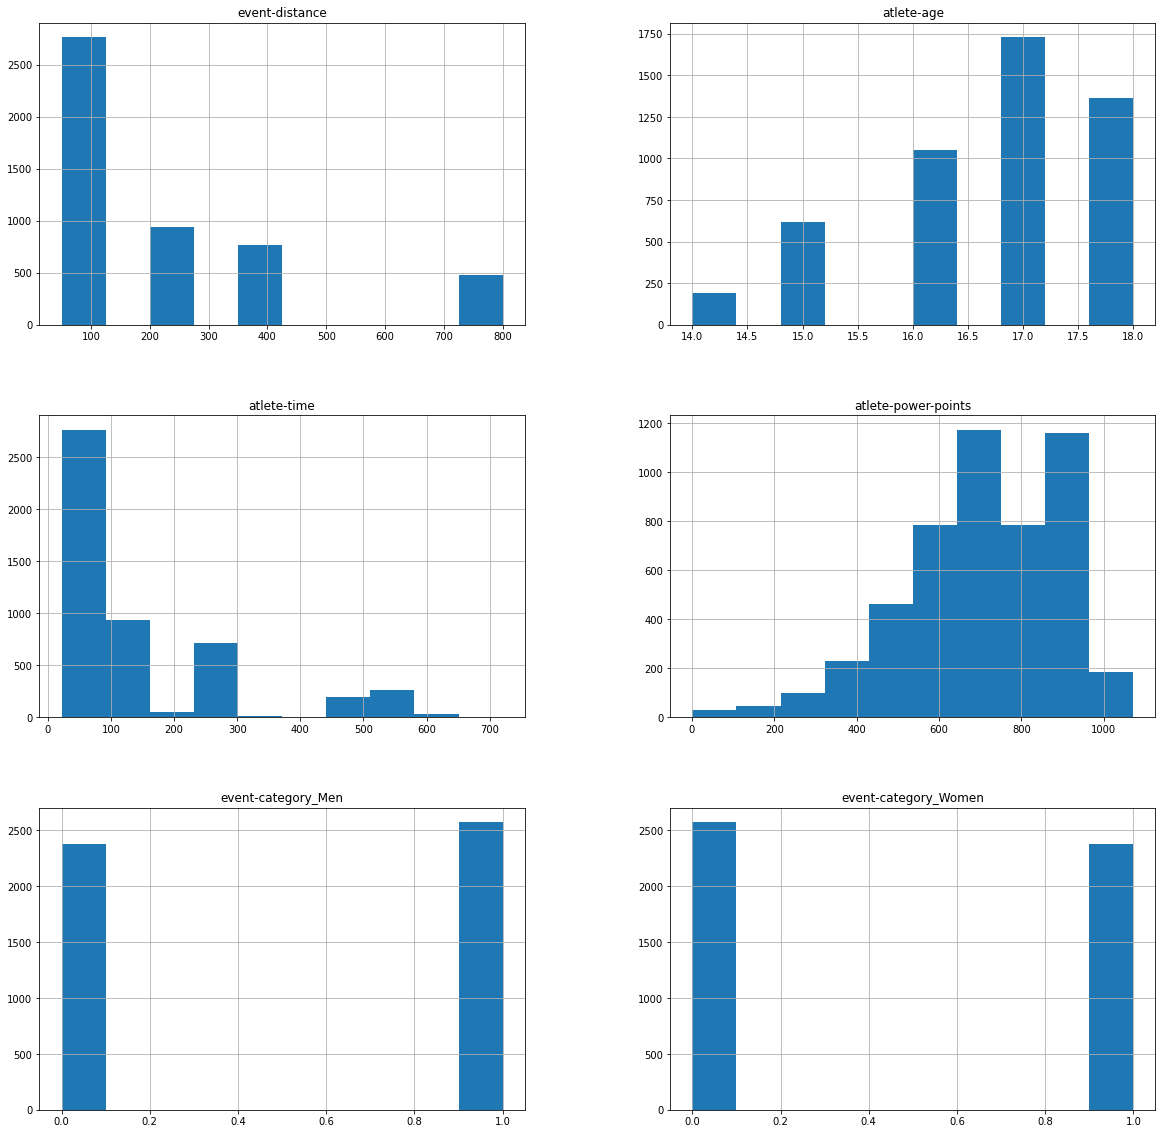

In [ ]:
df.hist(bins=10, figsize=(20,20))
plt.show()

**Observamos la distribucion de la variable objetivo**

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


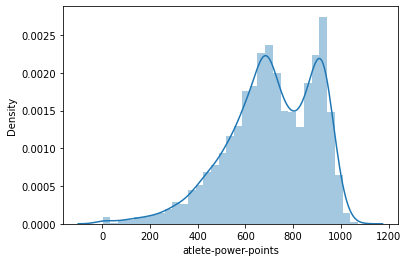

In [ ]:
sns.distplot(df['atlete-power-points'])

In [ ]:
asimetria = df['atlete-power-points'].skew()
curtosis = df['atlete-power-points'].kurt()
print(f'Asimetría: {asimetria}')
print(f'Curtosis: {curtosis}')

Asimetría: -0.6886545240160062
Curtosis: 0.35045194954167025


**Visualizamos la dispersion entre las variables dependientes y la independiente**

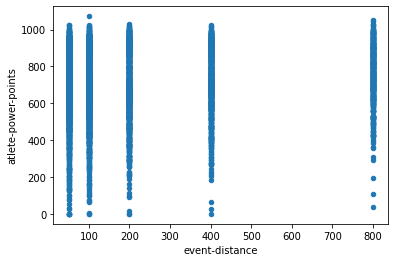

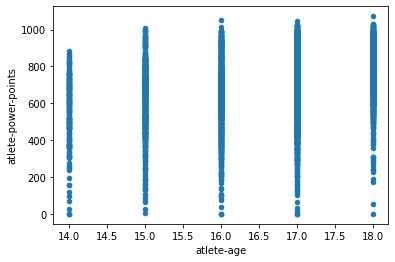

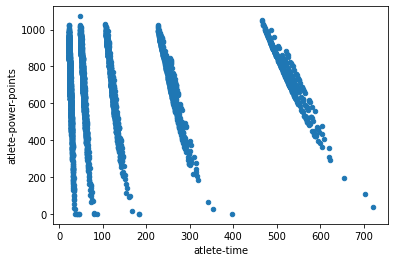

In [ ]:
df.plot.scatter(x='event-distance', y='atlete-power-points')
df.plot.scatter(x='atlete-age', y='atlete-power-points')
df.plot.scatter(x='atlete-time', y='atlete-power-points')
plt.show()

**Revisamos correlaciones**

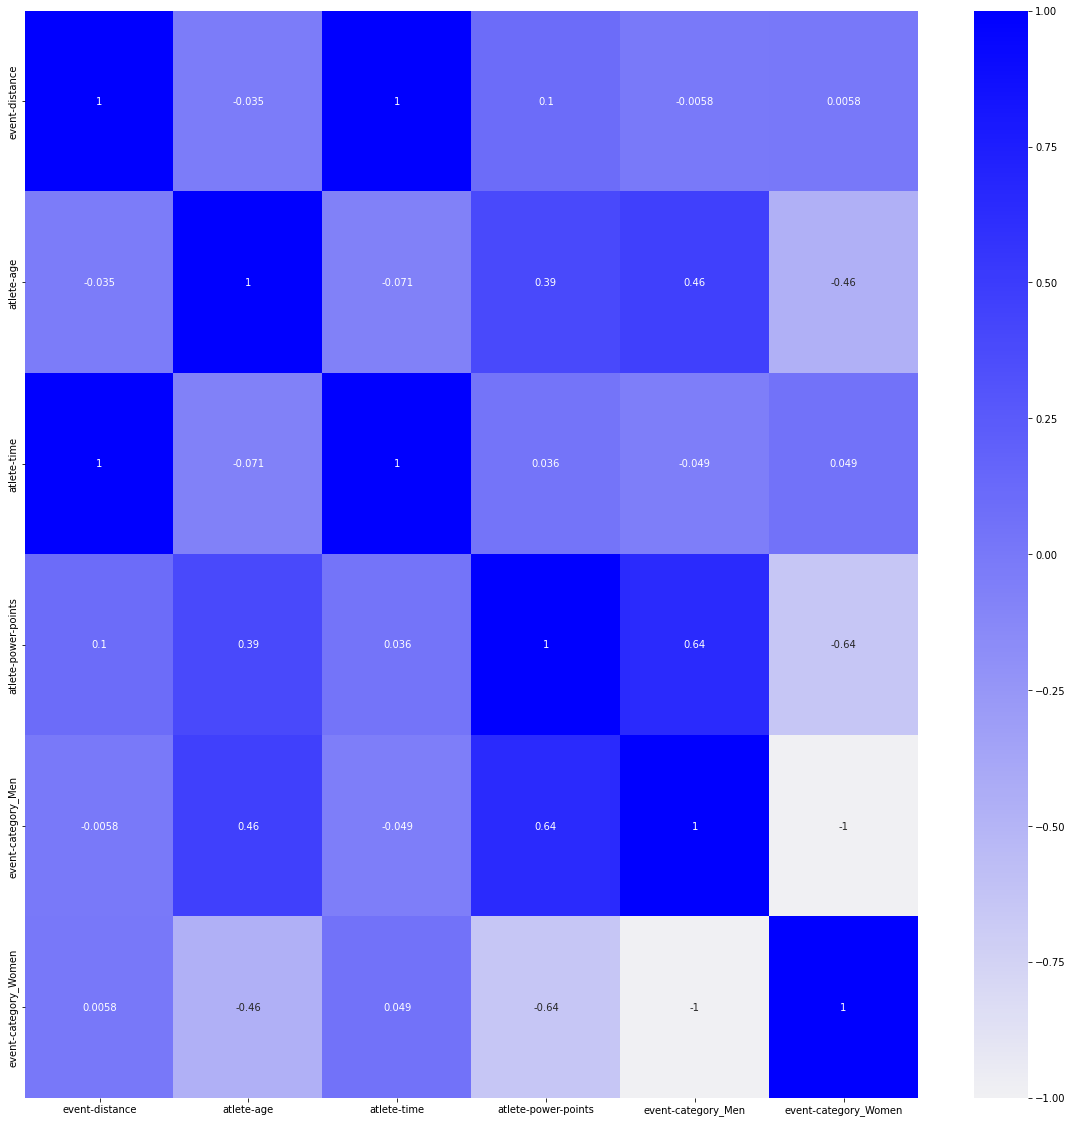

In [ ]:
plt.figure(figsize=(20,20))
corr = df.corr()
cmap = sns.color_palette("light:b", as_cmap=True)
sns.heatmap(corr, annot=True, cmap=cmap)

No existe una correlacion fuerte entre las variables independientes, por lo tanto no existe la necesidad de eliminar alguna.

**Escalamos Variables cuantitativas**

In [ ]:
scaler_pp = StandardScaler()
df[['atlete-power-points']]=scaler_pp.fit_transform(df[['atlete-power-points']])
df[['atlete-time', 'atlete-age', 'event-distance']]=StandardScaler().fit_transform(df[['atlete-time', 'atlete-age', 'event-distance']])
df

,event-distance,atlete-age,atlete-time,atlete-power-points,event-category_Men,event-category_Women
0,-0.760041,1.168050,-0.764710,1.376437,1,0
1,-0.760041,1.168050,-0.764307,1.349812,1,0
2,-0.760041,1.168050,-0.763364,1.285913,1,0
3,-0.760041,1.168050,-0.762018,1.190064,1,0
4,-0.760041,1.168050,-0.761884,1.179414,1,0
...,...,...,...,...,...,...
5382,2.603263,-1.523898,2.994072,-0.998495,0,1
5383,2.603263,0.270734,3.006725,-1.403192,0,1
5384,2.603263,-1.523898,3.015272,-1.073045,0,1
5385,2.603263,-2.421214,3.032502,-0.801472,0,1


**Generamos datos de prueba y validacion**

In [ ]:
x = df.drop(['atlete-power-points'],axis=1)
y= df['atlete-power-points']
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.25, random_state = 42)

**Generamos Regresion Lineal**

In [ ]:
LR_hip1 = LinearRegression()
LR_hip1.fit(x_train,y_train)
y_prediction_hip1 =  LR_hip1.predict(x_test)
score_hip1=r2_score(y_test,y_prediction_hip1)
print('r2 score de la hipotesis 1 es ',score_hip1)
print('error medio cuadratico de la hipotesis 1 es==',mean_squared_error(y_test,y_prediction_hip1))
print('la raiz del error medio cuadratico de la hipotesis 1 es==',np.sqrt(mean_squared_error(y_test,y_prediction_hip1)))


r2 score de la hipotesis 1 es  0.6047056259961591
error medio cuadratico de la hipotesis 1 es== 0.40473433272839815
la raiz del error medio cuadratico de la hipotesis 1 es== 0.63618734090549


**Función para obtener la evolución del error frente a las epochs**

In [ ]:
def show_results(hists, names):
  fig=plt.figure(figsize=(12, 8))
  leyenda = []
  i=0
  for h in hists:
    plt.plot(h.history['val_mean_squared_error'])
    leyenda.append(f'{names[i]}')
    i+=1
  plt.legend(leyenda)
  plt.xlabel('Epochs')
  plt.ylabel('Error medio cuadratico')
  plt.show()

**Generamos Red Neuronal 1**
- Arquitectura de la red:
        - *1º Capa*: capa de entrada donde indiques la dimensión de los datos.
        - *2º Capa*: capa densa con 8 neuronas y función de activación *relu*.
        - *3º Capa*: capa densa con 8 neuronas y función de activación *relu*.
        - *4º Capa*: capa de salida con una neurona sin función de activación.
    - Tipo de entrenamiento:
        - *Epochs*: 300
        - *Optimizador*: *adam*
        - *Learning Rate*: 0.001
        - *Función de error*: error cuadrático medio (*mean_squared_error*)

In [ ]:
print("Num training items: ", x_train.shape[0])
print("Num test items: ", x_test.shape[0])
print("Dimension input: ", x_train.shape)
print("Dimension output: ", y_train.shape)

RN_hip_2 = tf.keras.models.Sequential([
  tf.keras.layers.Input(shape=(5,)),
  tf.keras.layers.Dense(8, activation='relu'),
  tf.keras.layers.Dense(8, activation='relu'),
  tf.keras.layers.Dense(1)
])

RN_hip_2.summary()

# Definimos el optimizador cambiando el factor de entrenamiento
opt = tf.keras.optimizers.Adam(learning_rate=0.001)

# Compilamos el modelo
RN_hip_2.compile(optimizer=opt,
              loss='mean_squared_error',
                metrics=['mean_squared_error'])
# Entrenamos el modelo
hist1 = RN_hip_2.fit(x=x_train, y=y_train, epochs=300, validation_data=(x_test, y_test))

Num training items:  3716
Num test items:  1239
Dimension input:  (3716, 5)
Dimension output:  (3716,)
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 8)                 48        
                                                                 
 dense_1 (Dense)             (None, 8)                 72        
                                                                 
 dense_2 (Dense)             (None, 1)                 9         
                                                                 
Total params: 129
Trainable params: 129
Non-trainable params: 0
_________________________________________________________________
Epoch 1/300
117/117 [==============================] - 3s 4ms/step - loss: 0.9090 - mean_squared_error: 0.9090 - val_loss: 0.7632 - val_mean_squared_error: 0.7632
Epoch 2/300
117/117 [==============================] - 0

In [ ]:
print("Train score:", RN_hip_2.evaluate(x_train, y_train))
print("Test score:", RN_hip_2.evaluate(x_test, y_test))

117/117 [==============================] - 0s 2ms/step - loss: 0.0141 - mean_squared_error: 0.0141
Train score: [0.014101392589509487, 0.014101392589509487]
39/39 [==============================] - 0s 2ms/step - loss: 0.0172 - mean_squared_error: 0.0172
Test score: [0.017176460474729538, 0.017176460474729538]


**Generamos Red Neuronal 2**:
    
    Arquitectura de la red:
        - *1º Capa*: capa de entrada donde indiques la dimensión de los datos.
        - *2º Capa*: capa densa con 16 neuronas y función de activación *relu*.
        - *3º Capa*: capa densa con 16 neuronas y función de activación *relu*.
        - *4º Capa*: capa densa con 32 neuronas y función de activación *relu*.
        - *4º Capa*: capa de salida con una neurona sin función de activación.   
    - Tipo de entrenamiento:
        - *Epochs*: 300
        - *Optimizador*: *adam*
        - *Learning Rate*: 0.001
        - *Función de error*: error cuadrático medio (*mean_squared_error*)

In [ ]:
RN_hip_3 = tf.keras.models.Sequential([
  tf.keras.layers.Input(shape=(5,)),
  tf.keras.layers.Dense(16, activation='relu'),
  tf.keras.layers.Dense(16, activation='relu'),
  tf.keras.layers.Dense(32, activation='relu'),
  tf.keras.layers.Dense(1)
])
RN_hip_3.summary()

# Definimos el optimizador cambiando el factor de entrenamiento
opt2 = tf.keras.optimizers.Adam(learning_rate=0.001)

# Compilamos el modelo
RN_hip_3.compile(optimizer=opt2,
              loss='mean_squared_error',
                metrics=['mean_squared_error'])
# Entrenamos el modelo
hist2 = RN_hip_3.fit(x=x_train, y=y_train, epochs=300, validation_data=(x_test, y_test))

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_3 (Dense)             (None, 16)                96        
                                                                 
 dense_4 (Dense)             (None, 16)                272       
                                                                 
 dense_5 (Dense)             (None, 32)                544       
                                                                 
 dense_6 (Dense)             (None, 1)                 33        
                                                                 
Total params: 945
Trainable params: 945
Non-trainable params: 0
_________________________________________________________________
Epoch 1/300
117/117 [==============================] - 1s 4ms/step - loss: 0.6900 - mean_squared_error: 0.6900 - val_loss: 0.5605 - val_mean_squared_error: 0.5605
Epoch 2/300
117/117 [====

In [ ]:
print("Train score:", RN_hip_3.evaluate(x_train, y_train))
print("Test score:", RN_hip_3.evaluate(x_test, y_test))

117/117 [==============================] - 0s 2ms/step - loss: 0.0011 - mean_squared_error: 0.0011
Train score: [0.0011144542368128896, 0.0011144542368128896]
39/39 [==============================] - 0s 2ms/step - loss: 0.0022 - mean_squared_error: 0.0022
Test score: [0.002232020255178213, 0.002232020255178213]


**Vemos un excelente resultado de la 3ra hipotesis, vamos a aplicarle dropout del 25%**

In [ ]:
RN_hip_4 = tf.keras.models.Sequential([
  tf.keras.layers.Input(shape=(5,)),
  tf.keras.layers.Dense(16, activation='relu'),
  tf.keras.layers.Dense(16, activation='relu'),
  tf.keras.layers.Dropout(0.25),
  tf.keras.layers.Dense(32, activation='relu'),
  tf.keras.layers.Dense(1)
])
RN_hip_4.summary()
opt3 = tf.keras.optimizers.Adam(learning_rate=0.001)
# Compilamos el modelo
RN_hip_4.compile(optimizer=opt3,
              loss='mean_squared_error',
                metrics=['mean_squared_error'])
# Entrenamos el modelo
hist3 = RN_hip_4.fit(x=x_train, y=y_train, epochs=300, validation_data=(x_test, y_test))

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_7 (Dense)             (None, 16)                96        
                                                                 
 dense_8 (Dense)             (None, 16)                272       
                                                                 
 dropout (Dropout)           (None, 16)                0         
                                                                 
 dense_9 (Dense)             (None, 32)                544       
                                                                 
 dense_10 (Dense)            (None, 1)                 33        
                                                                 
Total params: 945
Trainable params: 945
Non-trainable params: 0
_________________________________________________________________
Epoch 1/300
117/117 [==============================] - 1

In [ ]:
print("Train score:", RN_hip_4.evaluate(x_train, y_train))
print("Test score:", RN_hip_4.evaluate(x_test, y_test))

117/117 [==============================] - 0s 2ms/step - loss: 0.0324 - mean_squared_error: 0.0324
Train score: [0.03235425800085068, 0.03235425800085068]
39/39 [==============================] - 0s 2ms/step - loss: 0.0311 - mean_squared_error: 0.0311
Test score: [0.031117163598537445, 0.031117163598537445]


**Comparamos todas las redes Neuronales**

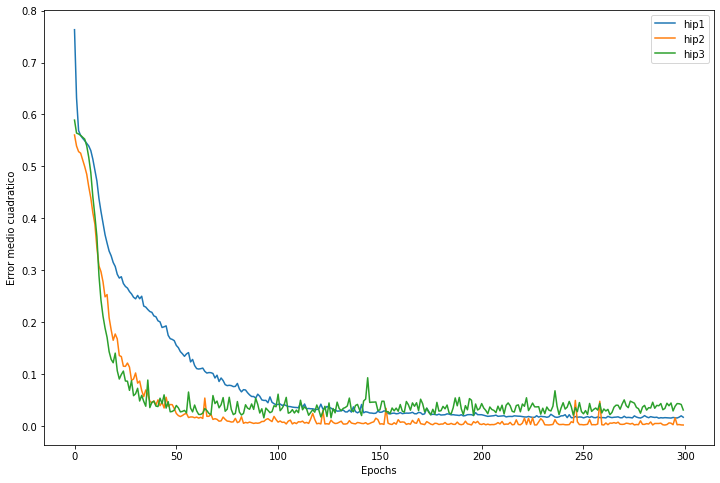

In [ ]:
show_results([hist1,hist2,hist3],['hip1', 'hip2', 'hip3'])

**Se graba la mejor opcion que es la hip3**

In [ ]:
joblib.dump(RN_hip_3, "model.pkl")

['model.pkl']

**Generacion de dataframe con resultados predichos por el modelo**

In [ ]:
# load
clf2 = joblib.load("model.pkl")

predict_arr=scaler_pp.inverse_transform(clf2.predict(x[0:]))

In [ ]:
new_df = pd.DataFrame(data = predict_arr, 
                  columns = ['predicted PP'])

new_df.reset_index(level=0, inplace=True)

df_origin.reset_index(level=0, inplace=True)

df_all = df_origin.merge(new_df, on='index', indicator = True) 

df_all.to_csv('datasetNew.csv', sep=',')